In [8]:
#Here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
import pylab as plt
import matplotlib.pyplot as plt


# Read data 
data = pd.read_csv("RS_TARP.csv")         #The command inputs the dataset file RS_TARP.csv
data.head()



,Compound,Eg_EV,kL,Density,EV_rank,kL_rank,density_rank,rank_avg,Fractional_Favourable
0,BiPtO3,0.540118,1.62,11.129,7,14,1,7.333333,0.755556
1,Pt1Si1Te1,0.180000,3.32,9.377,5,22,6,11.000000,0.633333
2,BaPtO3,0.088467,3.87,8.914,1,25,9,11.666667,0.611111
3,SrPtO3,0.148588,2.42,8.191,4,20,11,11.666667,0.611111
4,RbPtO3,0.148432,2.97,7.887,3,21,13,12.333333,0.588889


In [5]:
#SVR Code
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

X=data[['Eg_EV', 'kL', 'Density']]
y=data.Fractional_Favourable
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=100)
steps = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline = Pipeline(steps) 
grid = GridSearchCV(pipeline, param_grid= {'SVM__C': np.linspace(20,100,num=5), 'SVM__gamma':['auto'],
                        'SVM__kernel': ['linear','rbf'],'SVM__epsilon':[0.001,0.0001,0.00001,0.1,0.01]}, cv=5)   

grid.fit(X_train, y_train)

# Predict Percentage Favourability

a=input('Enter the Eg value(Only positive values): ');               
b=input('Enter the kl value(Only positive values): ');
c=input('Enter the density value(Only positive values): ');

Score=grid.predict([[a,b,c]]) #The three values inside[] should be Eg, kl and density values respectively.

Percent_score=Score*100;
print('The percentage favourability for a compound with Eg, kl and density as an electrode material is expressed as %f'
      %Percent_score)     
                   #The score out of 100 predicts how useful the compound is for its application as an anode material
                   #on the basis of the its Energy gap, thermal conductivity and volumetric density values.
    

Enter the Eg value(Only positive values): 0.54
Enter the kl value(Only positive values): 1.62
Enter the density value(Only positive values): 11.129
The percentage favourability for a compound with Eg, kl and density as an electrode material is expressed as 74.581423


In [6]:
#Performance metrics
test_pred = grid.predict(X_test)
MAE=metrics.mean_absolute_error(test_pred, y_test)
print('The mean absolute error obtained using support vector regression is %0.4f' %MAE)       #Finding the mean absolute error
MSE=metrics.mean_squared_error(test_pred, y_test)
print('The mean squared error obtained using support vector regression is %0.4f' %MSE)        #Finding the mean squared error
svr_score=grid.score(X_train,y_train)
print('The model accuracy obtained using training data is %0.4f' %svr_score)    

The mean absolute error obtained using support vector regression is 0.0272
The mean squared error obtained using support vector regression is 0.0010
The model accuracy obtained using training data is 0.9908


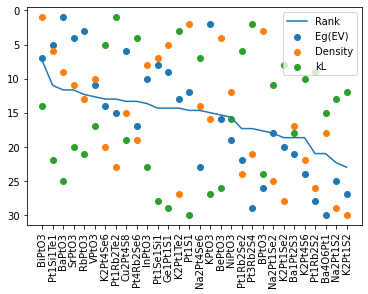

In [49]:
#Plot of Eg rank, density rank and kl rank for the dataset
X = np.linspace(0, 30, 1)
plt.scatter(data.Compound, data.EV_rank)
plt.scatter(data.Compound, data.density_rank)
plt.scatter(data.Compound, data.kL_rank)
plt.plot(data.Compound, data.rank_avg)
plt.legend(["Rank", "Eg(EV)", "Density", "kL"])
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

In [7]:
#Methodology to find the optimal parameters manually
grid.best_params_


{'SVM__C': 20.0,
 'SVM__epsilon': 0.01,
 'SVM__gamma': 'auto',
 'SVM__kernel': 'rbf'}

In [11]:
#Using best parameters of a linear kernel
svr=SVR(C=40.0, epsilon=0.1, kernel='linear');
svr.fit(X_train,y_train)
# Code for equation of hyperplane in linear kernel
print('weights: ')
print(svr.coef_)
print('Bias: ')
print(svr.intercept_)
#H(w)=w*X + bias


weights: 
[[-0.16294029 -0.01305827  0.0337422 ]]
Bias: 
[0.45616875]


In [ ]:
#The equation of hyperplane using linear kernel is Y = (-0.16294029*x1) - (0.01305827*x2) +
#                                    (0.0337422*x3) + 0.45616875
# x1 is the energy gap(eV) value, 
# x2 is the thermal conductivity(W/mK) value,
# x3 is the density of the material(kg/m3) value
# Y is the fractional favourability favourability
